# Exercise 4.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Linear Regression**

The goal of this exercise is to explore a simple linear regression problem based on Portugese white wine.

The dataset is based on
Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. **Modeling wine preferences by data mining from physicochemical properties**. Published in Decision Support Systems, Elsevier, 47(4):547-553, 2009.



In [ ]:
# The code snippet below is responsible for downloading the dataset
# - for example when running via Google Colab.
#
# You can also directly download the file using the link if you work
# with a local setup (in that case, ignore the !wget)

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2024-11-07 13:39:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-white.csv’

winequality-white.c     [  <=>               ] 258.23K  1001KB/s    in 0.3s    

2024-11-07 13:39:38 (1001 KB/s) - ‘winequality-white.csv’ saved [264426]



**Before we start**

The downloaded file contains data on 4989 wines. For each wine 11 features are recorded (column 0 to 10). The final columns contains the quality of the wine. This is what we want to predict. More information on the features and the quality measurement is provided in the original publication.

List of columns/features:
0. fixed acidity
1. volatile acidity
2. citric acid
3. residual sugar
4. chlorides
5. free sulfur dioxide
6. total sulfur dioxide
7. density
8. pH
9. sulphates
10. alcohol
11. quality



[file]: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [ ]:
# Before working with the data,
# we download and prepare all features

# load all examples from the file
data = np.genfromtxt('winequality-white.csv',delimiter=";",skip_header=1)

print("data:", data.shape)

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

# take the first 3000 examples for training
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column

# and the remaining examples for testing
X_test = data[3000:,:11] # all features except last column
y_test = data[3000:,11] # quality column

print("First example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])

data: (4898, 12)
First example:
Features: [7.400e+00 2.400e-01 2.900e-01 1.010e+01 5.000e-02 2.100e+01 1.050e+02
 9.962e-01 3.130e+00 3.500e-01 9.500e+00]
Quality: 5.0


# Problems


* First we want to understand the data better. Plot (`plt.hist`) the distribution of each of the features for the training data as well as the 2D distribution (either `plt.scatter` or `plt.hist2d`) of each feature versus quality. Also calculate the correlation coefficient (`np.corrcoef`) for each feature with quality. Which feature by itself seems most predictive for the quality?

* Calculate the linear regression weights. Numpy provides functions for matrix multiplication (`np.matmul`), matrix transposition (`.T`) and matrix inversion (`np.linalg.inv`).

* Use the weights to predict the quality for the test dataset. How
does your predicted quality compare with the true quality of the test data? Calculate the correlation coefficient between predicted and true quality and draw a scatter plot.

**Homework Submission**

When you submit your exercise sheet, please alwasy do two things

1) Generate a PDF of your iPython notebook. Submit this PDF through Studium

2) Provide a link to your google colab notebook so that we can directly execute and test your code. To do that click on "share", change access to "anyone with the link", copy the link and add it as a comment to your submission on Studium.

# Hints

Formally, we want to find weights $w_i$ that minimize:
$$
\sum_{j}\left(\sum_{i} X_{i j} w_{i}-y_{j}\right)^{2}
$$
The index $i$ denotes the different features (properties of the wines) while the index $j$ runs over the different wines. The matrix $X_{ij}$ contains the training data, $y_j$ is the 'true' quality for sample $j$. The weights can be found by taking the first derivative of the above expression with respect to the weights and setting it to zero (the standard strategy for finding an extremum), and solving the corresponding system of equations (for a detailed derivation, see [here](https://en.wikipedia.org/wiki/Ordinary_least_squares)). The result is:
$$
\overrightarrow{\mathbf{w}}=\left(\mathbf{X}^{T} \mathbf{X}\right)^{-1} \mathbf{X}^{T} \overrightarrow{\mathbf{y}}
$$

In the end, you should have as many components of $w_i$ as there are features in the data (i.e. eleven in this case).

You can use `.shape` to inspect the dimensions of numpy tensors.


# Solutions

In [ ]:
# Define feature names
feature_names = [
    'Fixed Acidity',
    'Volatile Acidity',
    'Citric Acid',
    'Residual Sugar',
    'Chlorides',
    'Free Sulfur Dioxide',
    'Total Sulfur Dioxide',
    'Density',
    'pH',
    'Sulphates',
    'Alcohol',
]

# Prepare for proper training
np.random.shuffle(data) # randomly sort examples

# take the first 3000 examples for training
X_train = data[:3000,:11] # all features except last column
y_train = data[:3000,11]  # quality column


**Task 1**

First, we want to understand the dataset better. Plot the distribution of each of the features for the training data as well as the 2D distribution of each feature versus quality. Also, calculate the correlation coefficient for each feature with quality. Which feature seems most predictive of the quality?


Fixed Acidity:



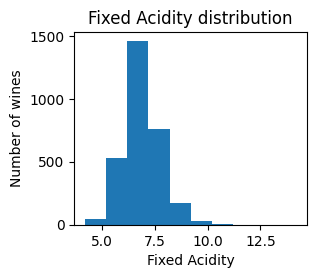

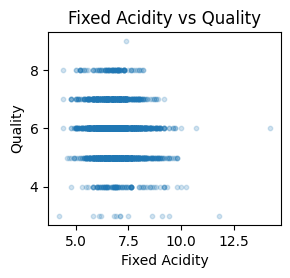

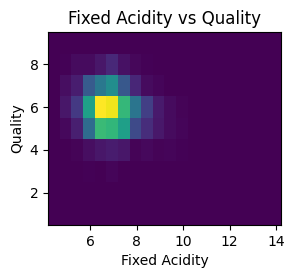

Correlation coefficient for Fixed Acidity: -0.118

----------------------------------------
----------------------------------------


Volatile Acidity:



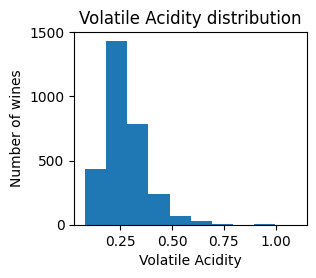

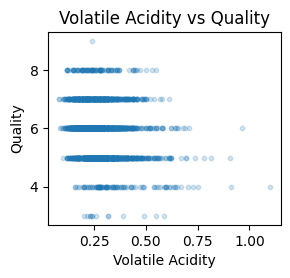

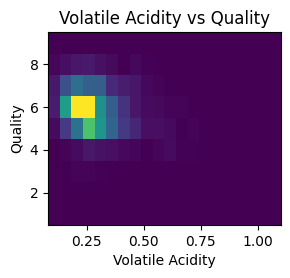

Correlation coefficient for Volatile Acidity: -0.206

----------------------------------------
----------------------------------------


Citric Acid:



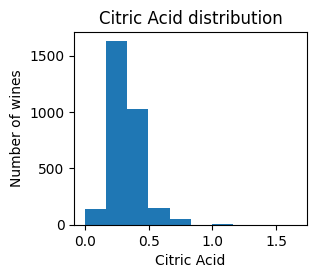

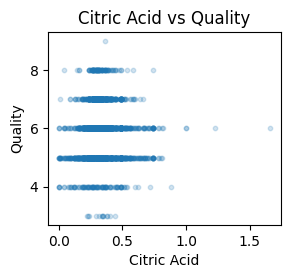

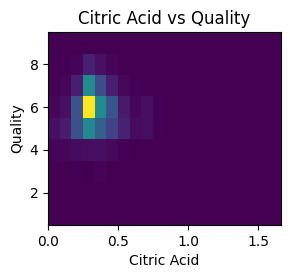

Correlation coefficient for Citric Acid: 0.001

----------------------------------------
----------------------------------------


Residual Sugar:



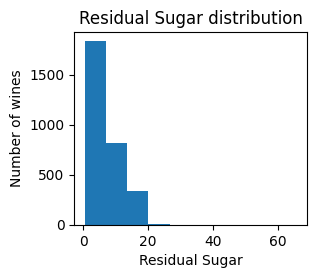

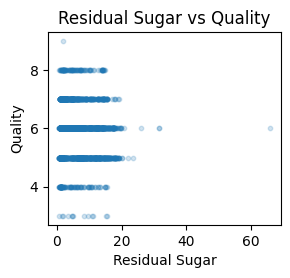

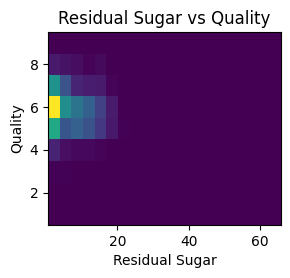

Correlation coefficient for Residual Sugar: -0.084

----------------------------------------
----------------------------------------


Chlorides:



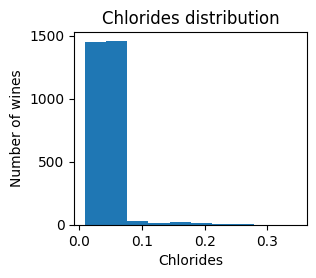

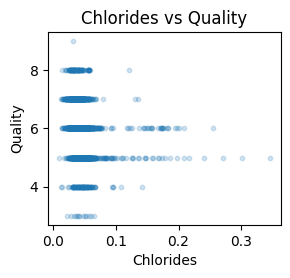

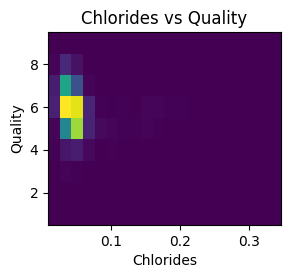

Correlation coefficient for Chlorides: -0.192

----------------------------------------
----------------------------------------


Free Sulfur Dioxide:



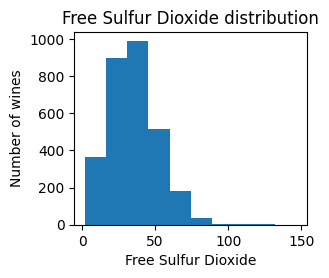

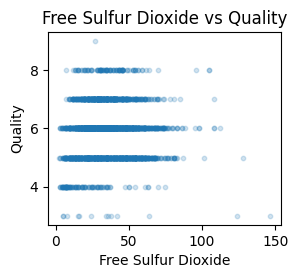

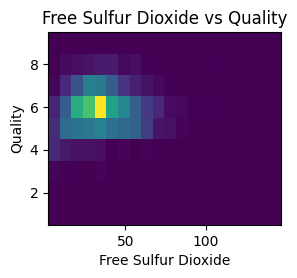

Correlation coefficient for Free Sulfur Dioxide: 0.043

----------------------------------------
----------------------------------------


Total Sulfur Dioxide:



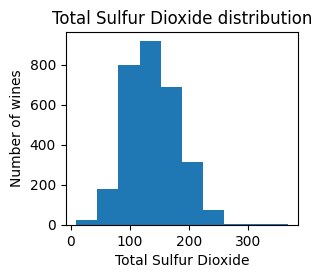

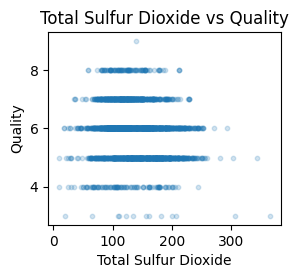

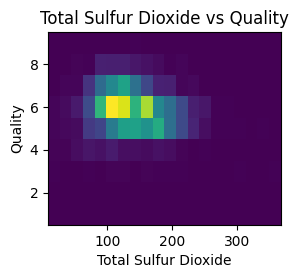

Correlation coefficient for Total Sulfur Dioxide: -0.161

----------------------------------------
----------------------------------------


Density:



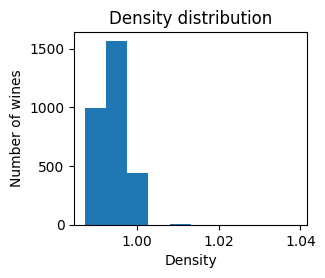

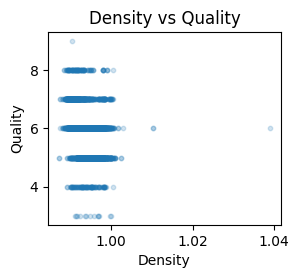

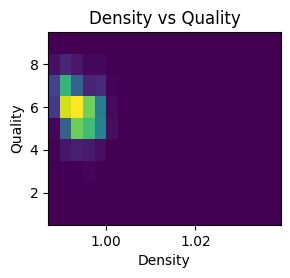

Correlation coefficient for Density: -0.290

----------------------------------------
----------------------------------------


pH:



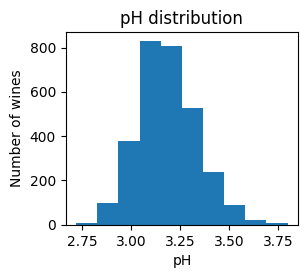

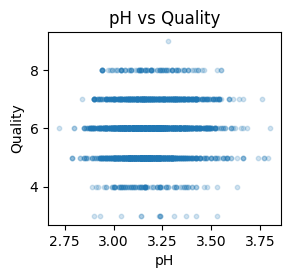

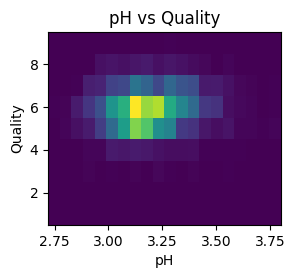

Correlation coefficient for pH: 0.086

----------------------------------------
----------------------------------------


Sulphates:



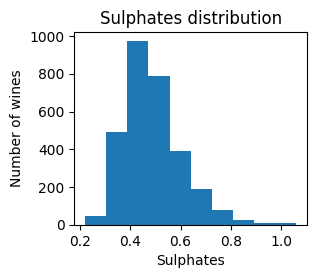

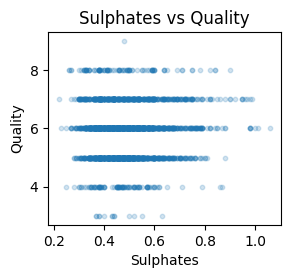

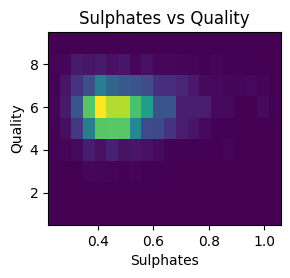

Correlation coefficient for Sulphates: 0.058

----------------------------------------
----------------------------------------


Alcohol:



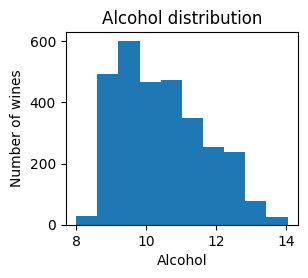

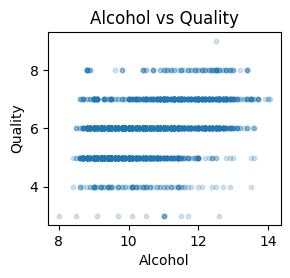

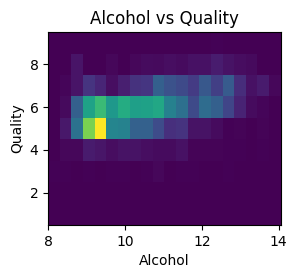

Correlation coefficient for Alcohol: 0.424

----------------------------------------
----------------------------------------


Alcohol is the most predictive for quality with a correlation of 0.424



'\n# Plot the distribution of each feature for the training data\nplt.figure(figsize=(15, 10))\nfor i in range(X_train.shape[1]):\n    plt.subplot(3, 4, i + 1)\n    plt.hist(X_train[:, i], bins=20)\n    plt.title(f\'{feature_names[i]} Distribution\')\n    plt.subplot(3, 4, X_train.shape[1] + 1)\n    plt.hist(y_train, bins=20, color=\'red\')\n    plt.title(\'Quality Distribution\')\nplt.tight_layout()\nplt.show()\n\n# Plot 2D distributions of each feature versus quality\nplt.figure(figsize=(15, 10))\nfor i in range(X_train.shape[1]):\n    plt.subplot(3, 4, i + 1)\n    plt.scatter(X_train[:, i], y_train, alpha=0.5)\n    plt.title(f\'{feature_names[i]} vs Quality\')\nplt.tight_layout()\nplt.show()\n\n# Calculate the correlation coefficient for each feature with quality\ncorrelations = []\nfor i in range(X_train.shape[1]):\n    correlation = np.corrcoef(X_train[:, i], y_train)[0, 1]\n    correlations.append(correlation)\n\n# Find the feature with the highest absolute correlation with quali

In [ ]:
### TASK 1 ###

correlations = []

for feat_idx, feat in enumerate(feature_names):
  print(f'\n{feat}:\n')
  # 1d histogram
  plt.figure(figsize=(3, 2.5))
  plt.hist(X_train[:, feat_idx])
  plt.xlabel(feat)
  plt.ylabel('Number of wines')
  plt.title(f'{feat} distribution')
  plt.show()

  # 2d scatter plot
  plt.figure(figsize=(3, 2.5))
  plt.scatter(X_train[:, feat_idx], y_train, s=10, alpha=0.2)
  plt.xlabel(feat)
  plt.ylabel('Quality')
  plt.title(f'{feat} vs Quality')
  plt.show()

  # scatter plot
  plt.figure(figsize=(3, 2.5))
  plt.hist2d(X_train[:, feat_idx], y_train, bins=[20, np.arange(0.5, 10.5, 1)])
  plt.xlabel(feat)
  plt.ylabel('Quality')
  plt.title(f'{feat} vs Quality')
  plt.show()

  # correlation coefficient
  corr = np.corrcoef(X_train[:, feat_idx], y_train)[0, 1]
  correlations.append(corr)
  print(f'Correlation coefficient for {feat}: {corr:.3f}\n\n----------------------------------------\n----------------------------------------\n')

best_feature_index = np.argmax(np.abs(correlations))
best_feature_correlation = correlations[best_feature_index]

print(f"\n{feature_names[best_feature_index]} is the most predictive for quality with a correlation of {best_feature_correlation:.3f}", end='\n\n')

"""
# Plot the distribution of each feature for the training data
plt.figure(figsize=(15, 10))
for i in range(X_train.shape[1]):
    plt.subplot(3, 4, i + 1)
    plt.hist(X_train[:, i], bins=20)
    plt.title(f'{feature_names[i]} Distribution')
    plt.subplot(3, 4, X_train.shape[1] + 1)
    plt.hist(y_train, bins=20, color='red')
    plt.title('Quality Distribution')
plt.tight_layout()
plt.show()

# Plot 2D distributions of each feature versus quality
plt.figure(figsize=(15, 10))
for i in range(X_train.shape[1]):
    plt.subplot(3, 4, i + 1)
    plt.scatter(X_train[:, i], y_train, alpha=0.5)
    plt.title(f'{feature_names[i]} vs Quality')
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient for each feature with quality
correlations = []
for i in range(X_train.shape[1]):
    correlation = np.corrcoef(X_train[:, i], y_train)[0, 1]
    correlations.append(correlation)

# Find the feature with the highest absolute correlation with quality
best_feature_index = np.argmax(np.abs(correlations))
best_feature_correlation = correlations[best_feature_index]

print(f"Correlation coefficients for each feature with quality:")
for i, corr in enumerate(correlations):
    print(f"Feature {feature_names[i]}: {corr:.3f}")

print(f"\n{feature_names[best_feature_index]} is the most predictive for quality with a correlation of {best_feature_correlation:.3f}", end='\n\n')
"""

**Task 2**

Calculate the linear regression weights by finding the weight matrix W that minimizes the mean squared error (MSE):

\begin{equation}
  (\boldsymbol{\mathrm{W}}\vec{x}-\vec{y})^2
\end{equation}

Here are the training data chemical properties and the true quality labels.

In [ ]:

### TASK 2 ###
X_train_with_intercept = np.column_stack((np.ones(X_train.shape[0]), X_train))

# Calculate the linear regression weights using the normal equation

# w = (X_T X)^{-1} X_T y
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), X_train.T),y_train)
print(w.shape)
print(w)

X_transpose = X_train_with_intercept.T
XTX = np.matmul(X_transpose, X_train_with_intercept)
XTy = np.matmul(X_transpose, y_train)
weights = np.linalg.solve(XTX, XTy)

# The weights include the intercept (bias) as the first element
intercept = weights[0]
feature_weights = weights[1:]

print("Intercept (Bias):", intercept)
print("Feature Weights:")
for i, feature_name in enumerate(feature_names):
    print(f"{feature_name}: {feature_weights[i]:.4f}")


(11,)
[-6.23231061e-02 -2.13068947e+00 -2.83566541e-02  2.36421800e-02
 -5.79608050e-01  6.79261943e-03 -1.22928874e-03  2.32806252e+00
  1.07471529e-01  4.68365128e-01  3.63762683e-01]
Intercept (Bias): 117.2493103271022
Feature Weights:
Fixed Acidity: 0.0271
Volatile Acidity: -2.0380
Citric Acid: 0.0188
Residual Sugar: 0.0690
Chlorides: 0.0299
Free Sulfur Dioxide: 0.0060
Total Sulfur Dioxide: -0.0008
Density: -116.6075
pH: 0.5123
Sulphates: 0.6391
Alcohol: 0.2306


(1898, 11) (11,) (1898,)
[6.8000e+00 2.4000e-01 2.9000e-01 9.5000e+00 4.2000e-02 5.6000e+01
 1.5700e+02 9.9586e-01 3.1100e+00 5.1000e-01 1.0100e+01]
[-6.23231061e-02 -2.13068947e+00 -2.83566541e-02  2.36421800e-02
 -5.79608050e-01  6.79261943e-03 -1.22928874e-03  2.32806252e+00
  1.07471529e-01  4.68365128e-01  3.63762683e-01]
6.009789614526115
Correlation coefficient: 0.508


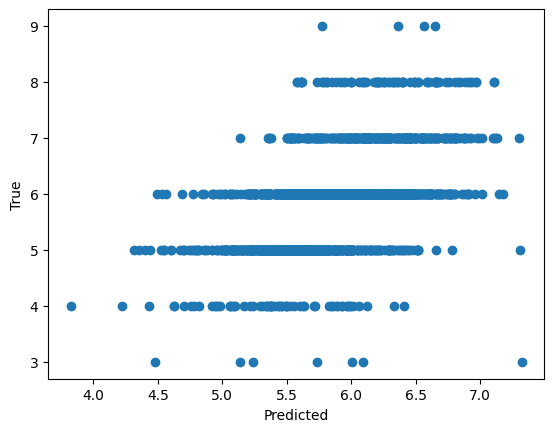

Correlation between Predicted and True Quality: 0.520


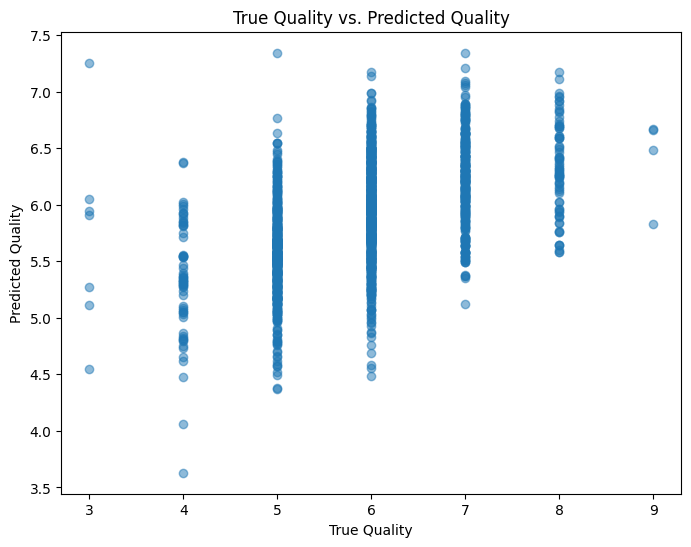


First example:
Features: [6.6000e+00 2.6000e-01 5.2000e-01 8.2000e+00 4.7000e-02 5.2000e+01
 1.9100e+02 9.9541e-01 3.1600e+00 4.7000e-01 9.5000e+00]
Quality: 6.0


In [ ]:

### TASK 3 ###

y_pred = np.matmul(X_test, w)
print(X_test.shape,w.shape,y_pred.shape)

print(X_test[0])
print(w)
print(y_pred[0])


print(f"Correlation coefficient: {np.corrcoef(y_pred,y_test)[0,1]:.3f}")

# Prepare scatter plot
plt.scatter(y_pred,y_test)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Add a column of ones to the feature matrix for the intercept term
X_test_with_intercept = np.column_stack((np.ones(X_test.shape[0]), X_test))

# Use the weights to make predictions for the test dataset
predicted_quality = np.matmul(X_test_with_intercept, weights)

# Calculate the correlation coefficient between predicted and true quality
correlation = np.corrcoef(predicted_quality, y_test)[0, 1]

print(f'Correlation between Predicted and True Quality: {correlation:.3f}')

# Draw a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicted_quality, alpha=0.5)
plt.xlabel("True Quality")
plt.ylabel("Predicted Quality")
plt.title("True Quality vs. Predicted Quality")
plt.show()

print("\nFirst example:")
print("Features:", X_train[0])
print("Quality:", y_train[0])

The prediction is not very accurate and has a low correlation of only ≈ 0.5.  It indicates a moderate positive linear relationship between my predictions and the true quality. My model captures some of the variability in quality, but there is room for improvement as the correlation should be closer to 1.

The reason for this could be that the variation of the features didn't give a good correlation to determine the quality of the wine. E.g. alcohol had the highest positive correlation of ≈ 0.44 and chlorides had the highest negative correlation of ≈ -0.221. The other features all had very low correlations with quality.

For the linear regression weights alcohol had the highest positive weight ≈ 0.2, meaning that higher alcohol concentration has a positive impact on predicting the quality. Chlorides have the highest negative weight ≈ -1, indicating that higher chloride content has a strong negative impact on the predicted quality.